In [ ]:
#------Import Libraries------#

In [113]:
import numpy

In [114]:
import matplotlib.pyplot as plt

In [115]:
import pandas as pd

In [116]:
#------Data Collection------#

In [117]:
dataset = pd.read_csv('salt_yield_dataset.csv')

In [118]:
dataset.columns

Index(['Pond_Area_m2', 'Brine_Density_g_cc', 'Evaporation_Days',
       'Avg_Temperature_C', 'Climate_Temp_Range_C', 'Solar_Irradiance_W_m2',
       'Crystallization_Method', 'Salt_Yield_tons'],
      dtype='object')

In [119]:
#------Data Pre-Processing------#
#Convert the Nominal data column(Crystallization_Method) using one-hot coding

In [120]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [121]:
dataset=dataset.astype(int)

In [122]:
dataset.columns

Index(['Pond_Area_m2', 'Brine_Density_g_cc', 'Evaporation_Days',
       'Avg_Temperature_C', 'Climate_Temp_Range_C', 'Solar_Irradiance_W_m2',
       'Salt_Yield_tons', 'Crystallization_Method_Continuous'],
      dtype='object')

In [123]:
#------Input-OutPut Split------#

In [124]:
independent=dataset[['Pond_Area_m2', 'Brine_Density_g_cc', 'Evaporation_Days',
       'Avg_Temperature_C', 'Climate_Temp_Range_C', 'Solar_Irradiance_W_m2', 'Crystallization_Method_Continuous']]

In [125]:
dependent=dataset[['Salt_Yield_tons']]

In [126]:
#------Check correlation - To check which of the input variable correlates with the independent variable-Salt_Yield_tons
Finding_Corr_Input = dataset.corr(numeric_only=True)['Salt_Yield_tons'].sort_values(ascending=False)
print(Finding_Corr_Input)

Salt_Yield_tons                      1.000000
Pond_Area_m2                         0.850138
Avg_Temperature_C                    0.250526
Climate_Temp_Range_C                 0.222086
Solar_Irradiance_W_m2                0.019328
Evaporation_Days                    -0.018084
Crystallization_Method_Continuous   -0.028444
Brine_Density_g_cc                        NaN
Name: Salt_Yield_tons, dtype: float64


In [127]:
#-------Pond_Area_m2 = 0.850138 is close 1 with highest absolute correlation , so choosing that to plot-------#

In [128]:
#------Plot Input and Output in Graph------#

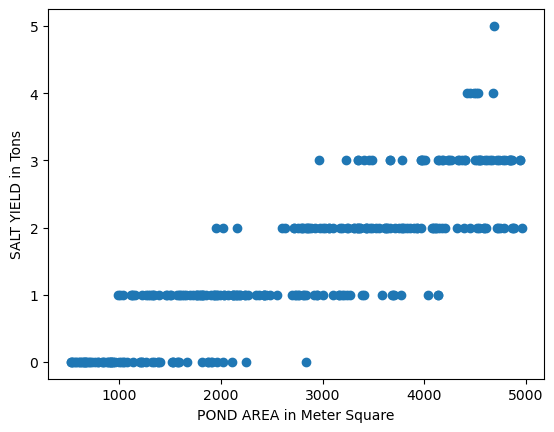

In [129]:
plt.scatter(dataset['Pond_Area_m2'],dataset['Salt_Yield_tons'])
plt.xlabel('POND AREA in Meter Square')
plt.ylabel('SALT YIELD in Tons')
plt.show()

In [130]:
# Train-Test Data Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=1/3,random_state=0)

In [133]:
# Train Set

In [134]:
X_train

,Pond_Area_m2,Brine_Density_g_cc,Evaporation_Days,Avg_Temperature_C,Climate_Temp_Range_C,Solar_Irradiance_W_m2,Crystallization_Method_Continuous
281,2021,1,30,26,11,472,1
250,1825,1,12,34,12,698,0
126,4181,1,14,37,12,509,0
171,574,1,35,24,7,508,1
71,1394,1,36,38,15,916,0
...,...,...,...,...,...,...,...
251,2232,1,32,36,13,770,0
192,4551,1,25,32,14,501,0
117,1339,1,39,31,9,839,1
47,2840,1,30,38,12,419,0


In [135]:
y_train

,Salt_Yield_tons
281,2
250,1
126,3
171,0
71,1
...,...
251,1
192,3
117,0
47,2


In [77]:
# Model Creation
# Finding slope and bias values by using X & Y Training Datasets

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
regressor=LinearRegression()

In [138]:
regressor.fit(X_train,y_train)

LinearRegression()

In [139]:
weight=regressor.coef_
print('Weight of the Regressor={}',weight)

Weight of the Regressor={} [[ 7.09161271e-04 -1.04517089e-16  5.45940896e-03  5.68452172e-02
  -1.88452316e-02  3.25033066e-05  5.10774601e-02]]


In [140]:
bias=regressor.intercept_
print('Intercept of the Regressor={}',weight)

Intercept of the Regressor={} [[ 7.09161271e-04 -1.04517089e-16  5.45940896e-03  5.68452172e-02
  -1.88452316e-02  3.25033066e-05  5.10774601e-02]]


In [141]:
# Test Set

In [144]:
y_pred=regressor.predict(X_test)

In [145]:
# Evaluation Metrics

In [146]:
from sklearn.metrics import r2_score

In [147]:
r_score=r2_score(y_test,y_pred)

In [148]:
r_score

0.7496563929756983

In [149]:
# Save the Best Model

In [150]:
import pickle
filename='final_salt_yield.sav'

In [151]:
pickle.dump(regressor,open(filename,'wb'))

In [ ]:
#-----End of Model Creation Phase-----#